<a href="https://colab.research.google.com/github/AbdoAlkayal/Machine_Learning/blob/main/RBM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical



Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# Load and preprocess Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)
print(y_train_cat.shape, y_test_cat.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 784) (10000, 784)
(60000,) (10000,)
(60000, 10) (10000, 10)


In [ ]:
# RBM parameters
visible_units = 784
hidden_units = 128
epochs = 10
batch_size = 128

# TF graph
v0 = tf.placeholder(tf.float32, [None, visible_units])
vb = tf.placeholder(tf.float32, [visible_units])
hb = tf.placeholder(tf.float32, [hidden_units])
w = tf.placeholder(tf.float32, [visible_units, hidden_units])

# Forward pass
_h0 = tf.nn.sigmoid(tf.matmul(v0, w) + hb)
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))
_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(w)) + vb)
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1, w) + hb)

In [ ]:
# Contrastive divergence
alpha = 1.0
w_pos_grad = tf.matmul(tf.transpose(v0), h0)
w_neg_grad = tf.matmul(tf.transpose(v1), h1)
cd = (w_pos_grad - w_neg_grad) / tf.cast(tf.shape(v0)[0], tf.float32)
update_w = w + alpha * cd
update_vb = vb + alpha * tf.reduce_mean(v0 - v1, 0)
update_hb = hb + alpha * tf.reduce_mean(h0 - h1, 0)

err = tf.reduce_mean(tf.square(v0 - v1))

In [ ]:
# Train RBM
cur_w = np.zeros([visible_units, hidden_units], np.float32)
cur_vb = np.zeros([visible_units], np.float32)
cur_hb = np.zeros([hidden_units], np.float32)
session = tf.Session()
session.run(tf.global_variables_initializer())
errors = []

for epoch in range(epochs):
    for i in range(0, len(x_train), batch_size):
        batch = x_train[i:i+batch_size]
        cur_w = session.run(update_w, feed_dict={v0: batch, w: cur_w, vb: cur_vb, hb: cur_hb})
        cur_vb = session.run(update_vb, feed_dict={v0: batch, w: cur_w, vb: cur_vb, hb: cur_hb})
        cur_hb = session.run(update_hb, feed_dict={v0: batch, w: cur_w, vb: cur_vb, hb: cur_hb})
    loss = session.run(err, feed_dict={v0: x_train, w: cur_w, vb: cur_vb, hb: cur_hb})
    print(f"Epoch {epoch+1} error: {loss}")
    errors.append(loss)

Epoch 1 error: 0.1480296105146408
Epoch 2 error: 0.1329442262649536
Epoch 3 error: 0.12855778634548187
Epoch 4 error: 0.12600597739219666
Epoch 5 error: 0.12582816183567047
Epoch 6 error: 0.12448681890964508
Epoch 7 error: 0.12380380183458328
Epoch 8 error: 0.12301921844482422
Epoch 9 error: 0.12158772349357605
Epoch 10 error: 0.12149790674448013


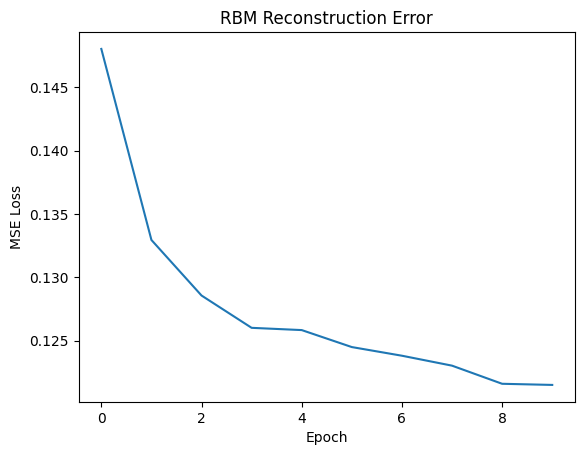

In [ ]:
plt.plot(errors)
plt.title("RBM Reconstruction Error")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

In [ ]:
# Extract latent features from RBM
def extract_features(data):
    h = tf.nn.sigmoid(tf.matmul(v0, w) + hb)
    return session.run(h, feed_dict={v0: data, w: cur_w, hb: cur_hb})

train_features = extract_features(x_train)
test_features = extract_features(x_test)

session.close()
tf.reset_default_graph()
# Assuming these are your extracted features and labels
# Save them to .npy files
np.save('train_features.npy', train_features)
np.save('test_features.npy', test_features)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

In [ ]:
from google.colab import files

files.download('train_features.npy')
files.download('test_features.npy')
files.download('y_train.npy')
files.download('y_test.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>